<a href="https://colab.research.google.com/github/javadhaditaghi/housing_price_mashhad/blob/main/Copy_of_Removing_Outliers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Doing General preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Access the file
file_path = "/content/drive/MyDrive/ICDS_DATA/data_scoringmethod.csv"

In [ ]:
data = pd.read_csv(file_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46066 entries, 0 to 46065
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    46066 non-null  int64  
 1   area                    46066 non-null  float64
 2   latitude                46066 non-null  float64
 3   longitude               46066 non-null  float64
 4   age                     46066 non-null  int64  
 5   floor                   46066 non-null  int64  
 6   bedrooms                46066 non-null  float64
 7   price                   46066 non-null  float64
 8   encoded_districts       46066 non-null  int64  
 9   encoded_neighborhoods   46066 non-null  int64  
 10  new_encoded_districts   46066 non-null  int64  
 11  description_score       46066 non-null  int64  
 12  age_group               46066 non-null  int64  
 13  bedrooms_to_area_ratio  46066 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 

In [ ]:
data.describe()

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
count,46066.000000,46066.000000,46066.000000,46066.000000,46066.000000,46066.000000,46066.000000,4.606600e+04,46066.000000,46066.000000,46066.000000,46066.000000,46066.000000,4.606600e+04
mean,0.109690,168.283081,36.330780,59.529932,7.099748,2.376156,2.379304,6.786318e+09,9.202275,11.697521,6.905549,3.868493,7.906829,inf
std,0.312507,2142.771387,0.034497,0.054650,7.720169,2.413411,0.857292,2.711579e+10,7.488188,6.003193,2.827122,2.271811,6.638651,NaN
min,0.000000,0.000000,34.929853,58.863373,0.000000,-130.000000,0.000000,1.111111e+06,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000e+00
25%,0.000000,86.000000,36.310228,59.475820,0.000000,1.000000,2.000000,2.650000e+09,6.000000,7.000000,4.000000,2.000000,3.000000,1.666667e-02
50%,0.000000,112.000000,36.327540,59.517400,5.000000,2.000000,2.000000,3.900000e+09,9.000000,9.000000,7.000000,4.000000,3.000000,1.935484e-02
75%,0.000000,156.000000,36.362353,59.571770,12.000000,4.000000,3.000000,6.600000e+09,12.000000,18.000000,9.000000,5.000000,13.000000,2.222222e-02
max,1.000000,300000.000000,36.528536,60.525852,98.000000,30.000000,12.000000,4.300000e+12,45.000000,22.000000,11.000000,14.000000,27.000000,inf


In [ ]:
data

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
0,0,73.0,36.373776,59.475820,11,1,2.0,2.200000e+09,12,9,7,3,13,0.027397
1,0,100.0,36.327670,59.548380,7,1,2.0,4.800000e+09,2,13,4,5,7,0.020000
2,0,140.0,36.310605,59.504477,0,2,2.0,1.020000e+10,9,18,8,6,3,0.014286
3,0,65.0,36.400540,59.388382,6,4,1.0,8.700000e+08,12,9,7,1,7,0.015385
4,0,200.0,36.373776,59.475820,0,0,3.0,5.350000e+09,12,9,7,7,3,0.015000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46061,0,110.0,36.328550,59.513390,4,4,2.0,5.100000e+09,11,20,10,4,3,0.018182
46062,0,110.0,36.371452,59.484620,4,3,2.0,4.100000e+09,12,9,7,4,3,0.018182
46063,0,140.0,36.319780,59.494770,15,1,2.0,5.500000e+09,9,18,8,3,13,0.014286
46064,0,130.0,36.349873,59.488426,4,2,3.0,4.100000e+09,10,5,2,3,3,0.023077


In [ ]:
#It's time to calculate the correlation

numeric_data = data[ ["type", "area", "latitude", "longitude", "age", "floor", "bedrooms", "price", "encoded_districts", "encoded_neighborhoods", "new_encoded_districts", "description_score", "age_group", "bedrooms_to_area_ratio"]]

numeric_data.corr()

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
type,1.000000,0.028871,-0.204395,0.222769,0.467028,-0.345533,0.249762,0.104499,-0.028267,0.019445,-0.015154,-0.258331,0.478131,-0.157194
area,0.028871,1.000000,-0.013251,0.016078,0.002662,-0.005011,0.020682,0.075632,-0.006709,0.006412,0.003758,-0.005990,0.003680,-0.074551
latitude,-0.204395,-0.013251,1.000000,-0.698213,-0.183223,0.087159,-0.074252,-0.069422,0.139689,-0.324645,-0.221171,0.139685,-0.187125,0.112689
longitude,0.222769,0.016078,-0.698213,1.000000,0.124896,-0.105142,-0.074577,0.020616,-0.046737,-0.123560,-0.225901,-0.239701,0.125137,-0.089789
age,0.467028,0.002662,-0.183223,0.124896,1.000000,-0.288729,-0.019689,0.020945,-0.095429,0.079193,0.010892,-0.416248,0.974382,0.054132
floor,-0.345533,-0.005011,0.087159,-0.105142,-0.288729,1.000000,0.051144,0.004116,0.017180,0.048338,0.064752,0.238970,-0.282064,0.012547
bedrooms,0.249762,0.020682,-0.074252,-0.074577,-0.019689,0.051144,1.000000,0.215217,-0.078847,0.376965,0.319915,0.266649,0.012507,0.059035
price,0.104499,0.075632,-0.069422,0.020616,0.020945,0.004116,0.215217,1.000000,-0.044219,0.131458,0.112548,0.031816,0.029945,-0.146656
encoded_districts,-0.028267,-0.006709,0.139689,-0.046737,-0.095429,0.017180,-0.078847,-0.044219,1.000000,-0.189522,-0.211696,0.037159,-0.099948,0.063255
encoded_neighborhoods,0.019445,0.006412,-0.324645,-0.123560,0.079193,0.048338,0.376965,0.131458,-0.189522,1.000000,0.867156,0.225650,0.098264,-0.115283


Using IQR method is the best one for AREA (Because of the skewedness)

Finding Outliers of area

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data['area'].quantile(0.25)
Q3 = data['area'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.2 * IQR
upper_bound = Q3 + 1.2 * IQR

# Identify outliers using the bounds
outliers = data[(data['area'] < lower_bound) | (data['area'] > upper_bound)]

# Display or manipulate the identified outliers as needed
outliers

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
5,1,1000.0,36.476097,59.407570,6,0,4.0,2.500000e+10,12,9,7,3,7,0.004000
19,1,470.0,36.272780,59.602730,30,0,5.0,2.000000e+11,8,16,9,1,27,0.010638
27,1,250.0,36.270720,59.635040,24,0,5.0,4.000000e+09,6,7,6,2,23,0.020000
33,1,250.0,36.299350,59.565440,10,0,4.0,3.400000e+10,1,21,11,2,7,0.016000
48,1,275.0,36.317990,59.607300,30,0,4.0,1.000000e+10,2,4,4,2,27,0.014545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45996,1,280.0,36.313811,59.500077,22,0,4.0,2.700000e+10,9,18,8,3,23,0.014286
46006,1,500.0,36.270720,59.635040,12,0,5.0,8.500000e+09,6,7,6,2,13,0.010000
46036,1,900.0,36.516170,59.391796,1,0,2.0,2.900000e+09,12,9,7,3,3,0.002222
46045,1,250.0,36.272780,59.602730,12,0,5.0,1.800000e+10,8,16,9,3,13,0.020000


Deleting them

In [ ]:

# data_1 = data[(data['area'] > lower_bound) & (data['area'] < upper_bound)]
data = data[(data['area'] >= lower_bound) & (data['area'] <= upper_bound)]



data

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
0,0,73.0,36.373776,59.475820,11,1,2.0,2.200000e+09,12,9,7,3,13,0.027397
1,0,100.0,36.327670,59.548380,7,1,2.0,4.800000e+09,2,13,4,5,7,0.020000
2,0,140.0,36.310605,59.504477,0,2,2.0,1.020000e+10,9,18,8,6,3,0.014286
3,0,65.0,36.400540,59.388382,6,4,1.0,8.700000e+08,12,9,7,1,7,0.015385
4,0,200.0,36.373776,59.475820,0,0,3.0,5.350000e+09,12,9,7,7,3,0.015000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46061,0,110.0,36.328550,59.513390,4,4,2.0,5.100000e+09,11,20,10,4,3,0.018182
46062,0,110.0,36.371452,59.484620,4,3,2.0,4.100000e+09,12,9,7,4,3,0.018182
46063,0,140.0,36.319780,59.494770,15,1,2.0,5.500000e+09,9,18,8,3,13,0.014286
46064,0,130.0,36.349873,59.488426,4,2,3.0,4.100000e+09,10,5,2,3,3,0.023077


In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.6 * IQR
upper_bound = Q3 + 1.6 * IQR

# Identify outliers using the bounds
outliers_1 = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]

# Display or manipulate the identified outliers as needed
outliers_1

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
3461,0,115.0,36.373776,59.475820,98,3,2.0,3.450000e+09,12,9,7,0,27,0.017391
13026,0,187.0,36.302245,59.576949,40,3,3.0,6.800000e+09,1,19,11,0,27,0.016043
31379,0,105.0,36.293832,59.593750,38,3,2.0,2.600000e+09,1,19,11,0,27,0.019048
33121,0,80.0,36.311730,59.473980,40,1,1.0,1.200000e+09,9,12,8,0,27,0.012500
35138,0,120.0,36.286574,59.603002,41,3,2.0,5.000000e+09,8,16,9,0,27,0.016667
38809,0,185.0,36.290054,59.582405,40,4,3.0,6.670000e+09,1,21,11,0,27,0.016216


Deleting them

In [ ]:
data = data[(data['age']>= lower_bound) & (data['age']<= upper_bound)]
data

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
0,0,73.0,36.373776,59.475820,11,1,2.0,2.200000e+09,12,9,7,3,13,0.027397
1,0,100.0,36.327670,59.548380,7,1,2.0,4.800000e+09,2,13,4,5,7,0.020000
2,0,140.0,36.310605,59.504477,0,2,2.0,1.020000e+10,9,18,8,6,3,0.014286
3,0,65.0,36.400540,59.388382,6,4,1.0,8.700000e+08,12,9,7,1,7,0.015385
4,0,200.0,36.373776,59.475820,0,0,3.0,5.350000e+09,12,9,7,7,3,0.015000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46061,0,110.0,36.328550,59.513390,4,4,2.0,5.100000e+09,11,20,10,4,3,0.018182
46062,0,110.0,36.371452,59.484620,4,3,2.0,4.100000e+09,12,9,7,4,3,0.018182
46063,0,140.0,36.319780,59.494770,15,1,2.0,5.500000e+09,9,18,8,3,13,0.014286
46064,0,130.0,36.349873,59.488426,4,2,3.0,4.100000e+09,10,5,2,3,3,0.023077


### Floors

In [ ]:
data["floor"].unique()

array([   1,    2,    4,    0,    5,    3,    9,    6,    8,    7,   -1,
         10,   11,   17,   15,   14,   30,   13,   18,   12, -130,   16,
         20])

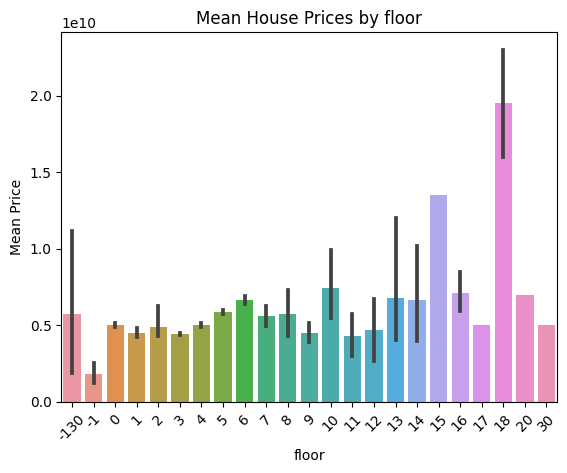

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='floor', y='price', data=data, estimator=np.mean)
plt.xticks(rotation=45)
plt.xlabel('floor')
plt.ylabel('Mean Price')
plt.title('Mean House Prices by floor')
plt.show()


In [ ]:
filtered_data = data[data['floor'] < 0]
filtered_data

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
214,0,155.0,36.204212,59.662045,0,-1,3.0,3.720000e+09,2,2,4,0,3,0.019355
2593,0,75.0,36.323220,59.606620,0,-1,2.0,1.200000e+09,2,4,4,0,3,0.026667
3490,0,68.0,36.318450,59.587680,15,-1,1.0,2.040000e+09,2,4,4,0,13,0.014706
6370,0,45.0,36.320690,59.600580,1,-1,1.0,1.160000e+09,2,4,4,2,3,0.022222
8178,0,100.0,36.326080,59.507990,11,-1,1.0,1.200000e+09,11,17,10,0,13,0.010000
8453,0,68.0,36.326877,59.619993,12,-1,1.0,1.600000e+09,2,4,4,0,13,0.014706
10508,0,85.0,36.332341,59.485542,16,-1,1.0,8.000000e+08,9,12,8,0,17,0.011765
13236,0,65.0,36.362247,59.510600,7,-1,1.0,1.260000e+09,10,5,2,0,7,0.015385
18491,0,85.0,36.376953,59.459780,2,-130,2.0,2.690000e+09,12,9,7,5,3,0.023529
19880,0,81.0,36.283097,59.508573,11,-1,2.0,1.450000e+09,9,11,8,0,13,0.024691


In [ ]:
outliers = data[(data['floor'] == -130)]
outliers


,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
18491,0,85.0,36.376953,59.459780,2,-130,2.0,2.690000e+09,12,9,7,5,3,0.023529
22129,0,142.0,36.272780,59.602730,0,-130,3.0,1.111111e+09,8,16,9,3,3,0.021127
26697,0,200.0,36.308098,59.562786,16,-130,2.0,1.400000e+10,1,22,11,3,17,0.010000
36071,0,140.0,36.373776,59.475820,0,-130,3.0,5.100000e+09,12,9,7,4,3,0.021429


In [ ]:
outliers_index = data[data['floor'] == -130].index
data.drop(outliers_index, inplace=True)


<ipython-input-863-50e327297e64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(outliers_index, inplace=True)


Deleting the outliers based on the

> Indented block



In [ ]:
# data['bedrooms_to_area_ratio'] = data['bedrooms'] / data['area']


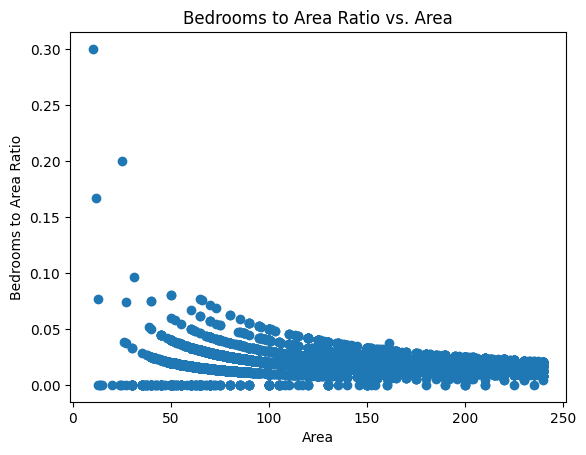

In [ ]:

plt.scatter(data['area'], data['bedrooms_to_area_ratio'])
plt.xlabel('Area')
plt.ylabel('Bedrooms to Area Ratio')
plt.title('Bedrooms to Area Ratio vs. Area')
plt.show()


***Floor***

In [ ]:
# Assuming you already identified the outliers as mentioned in the previous response
outliers_indices = data[data['bedrooms_to_area_ratio'] > 0.032].index

# Remove the outliers from the original DataFrame
data = data.drop(outliers_indices)

# The 'your_data_cleaned' DataFrame now contains your data with the outliers removed.

In [ ]:
bed_zero = data[data['bedrooms_to_area_ratio'] == 0]
bed_zero

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
203,0,15.0,36.311730,59.47398,12,0,0.0,2.700000e+08,9,12,8,0,13,0.0
304,0,85.0,36.316310,59.60839,0,3,0.0,1.170000e+09,2,4,4,3,3,0.0
414,0,60.0,36.323220,59.60662,7,0,0.0,1.400000e+09,2,4,4,1,7,0.0
526,0,53.0,36.327670,59.54838,15,0,0.0,2.900000e+09,2,13,4,0,13,0.0
558,1,120.0,36.318450,59.58768,0,0,0.0,6.100000e+08,2,4,4,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43953,1,60.0,36.306850,59.57511,17,0,0.0,8.500000e+09,1,15,11,1,17,0.0
44079,0,90.0,36.243195,59.60598,2,4,0.0,7.500000e+08,7,3,5,0,3,0.0
44216,1,120.0,36.327540,59.52752,30,0,0.0,1.350000e+10,11,20,10,4,27,0.0
44304,0,90.0,36.323220,59.60662,0,2,0.0,1.600000e+09,2,4,4,2,3,0.0


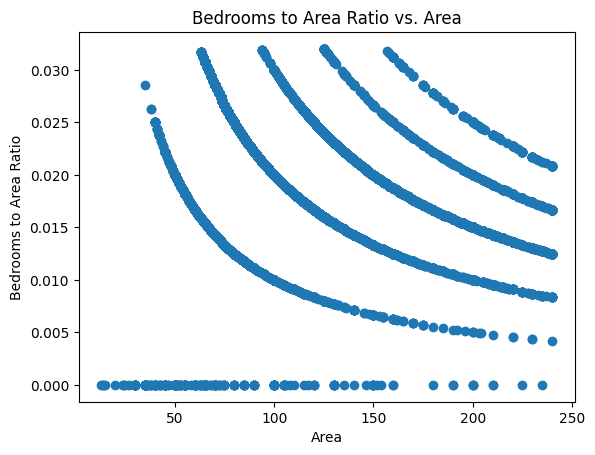

In [ ]:
plt.scatter(data['area'], data['bedrooms_to_area_ratio'])
plt.xlabel('Area')
plt.ylabel('Bedrooms to Area Ratio')
plt.title('Bedrooms to Area Ratio vs. Area')
plt.show()

In [ ]:
# Create a Boolean mask for the outlier condition
outlier_mask = (data['area'] > 100) & (data['bedrooms'] == 0) & (data['age'] <= 2)

# Use the mask to filter the data and identify the outliers
outliers = data[outlier_mask]
outliers

# For example, to remove the outliers from your data:
# data = data[~outlier_mask]


,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
558,1,120.0,36.318450,59.587680,0,0,0.0,6.100000e+08,2,4,4,0,3,0.0
2698,0,110.0,36.318450,59.587680,0,4,0.0,8.000000e+08,2,4,4,2,3,0.0
7433,1,140.0,36.303140,59.633800,0,0,0.0,7.500000e+08,3,1,1,1,3,0.0
10580,0,200.0,36.287380,59.598476,0,9,0.0,1.200000e+10,8,16,9,3,3,0.0
11440,0,210.0,36.327670,59.548380,0,0,0.0,2.450000e+09,2,13,4,0,3,0.0
13936,0,210.0,36.380667,59.484676,0,0,0.0,5.600000e+09,12,9,7,5,3,0.0
17881,0,130.0,36.296030,59.643700,0,0,0.0,3.500000e+09,45,6,3,6,3,0.0
19518,0,130.0,36.313550,59.491280,2,1,0.0,1.000000e+09,9,12,8,0,3,0.0
21362,1,150.0,36.472813,59.498264,1,0,0.0,8.000000e+08,12,9,7,3,3,0.0
21748,0,160.0,36.326877,59.619993,0,4,0.0,1.300000e+09,2,4,4,0,3,0.0


In [ ]:
# Generate random numbers between 2 and 4 for each outlier
random_numbers = np.random.uniform(2, 4, size=outliers.shape[0])

# Add the random numbers to the outliers
outliers['bedrooms'] = outliers['bedrooms'] + random_numbers  # Replace 'original_column' with the column you want to adjust

# Optionally, you can choose to replace the outliers in your data with the adjusted values
# data.loc[outlier_mask, 'original_column'] = outliers['adjusted_column']

<ipython-input-870-8df077443405>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['bedrooms'] = outliers['bedrooms'] + random_numbers  # Replace 'original_column' with the column you want to adjust


In [ ]:
outliers

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio
558,1,120.0,36.318450,59.587680,0,0,3.884998,6.100000e+08,2,4,4,0,3,0.0
2698,0,110.0,36.318450,59.587680,0,4,3.227100,8.000000e+08,2,4,4,2,3,0.0
7433,1,140.0,36.303140,59.633800,0,0,2.428936,7.500000e+08,3,1,1,1,3,0.0
10580,0,200.0,36.287380,59.598476,0,9,3.878838,1.200000e+10,8,16,9,3,3,0.0
11440,0,210.0,36.327670,59.548380,0,0,3.500907,2.450000e+09,2,13,4,0,3,0.0
13936,0,210.0,36.380667,59.484676,0,0,3.502180,5.600000e+09,12,9,7,5,3,0.0
17881,0,130.0,36.296030,59.643700,0,0,2.423443,3.500000e+09,45,6,3,6,3,0.0
19518,0,130.0,36.313550,59.491280,2,1,3.660313,1.000000e+09,9,12,8,0,3,0.0
21362,1,150.0,36.472813,59.498264,1,0,2.480190,8.000000e+08,12,9,7,3,3,0.0
21748,0,160.0,36.326877,59.619993,0,4,3.263241,1.300000e+09,2,4,4,0,3,0.0


In [ ]:
# sns.histplot(data['age'], kde=True)
# plt.show()

In [ ]:
# import pandas as pd

# # Assuming you have a DataFrame named 'data'

# # Define the bin edges and labels
# bin_edges = [-1, 5, 10, 15, 20, 25, 100]  # Define the age bin edges
# bin_labels = ['3', '7', '13', '17', '23', '27']  # Labels for the bins

# # Create a new column 'age_group' with age bins
# data['age_group'] = pd.cut(data['age'], bins=bin_edges, labels=bin_labels)


# # Display the modified DataFrame
# data


In [ ]:
# sns.histplot(data['age_group'], kde=True)
# plt.show()

In [ ]:
data['age_group'].isna().sum()

0

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.barplot(x='age_group', y='price', data=data, estimator=np.mean)
# plt.xticks(rotation=45)
# plt.xlabel('Districts')
# plt.ylabel('Median Price')
# plt.title('Mean House Prices by age group')
# plt.show()

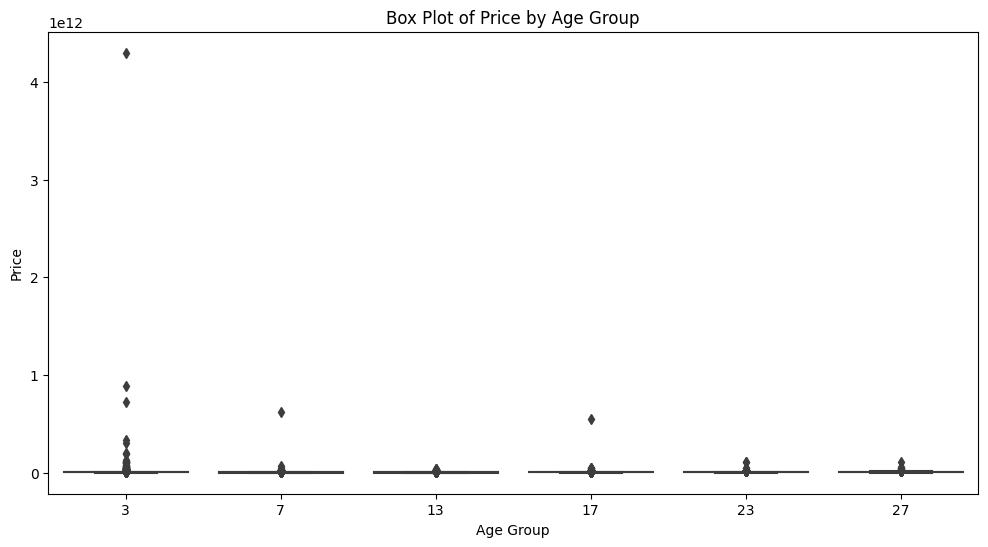

In [ ]:

# Create a box plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(x='age_group', y='price', data=data)

# Add labels and a title
plt.xlabel('Age Group')
plt.ylabel('Price')
plt.title('Box Plot of Price by Age Group')

# Show the plot
plt.show()

In [ ]:
# Create Boolean masks for each condition
apartments_mask = (data['type'] == 0) & (data['age'] > 20)
houses_mask = (data['type'] == 1) & (data['age'] > 20)

# Create two new columns based on the conditions
# data['apartments_age_gt_20'] = apartments_mask.astype(int)
# data['houses_age_gt_20'] = houses_mask.astype(int)


In [ ]:
# # Calculate the counts for each category
# apartments_count = data['apartments_age_gt_20'].sum()
# houses_count = data['houses_age_gt_20'].sum()

# # Create a bar plot
# categories = ['Apartments', 'Houses']
# counts = [apartments_count, houses_count]

# plt.bar(categories, counts)
# plt.xlabel('Property Type')
# plt.ylabel('Count')
# plt.title('Counts of Properties with Age > 20 Years')
# plt.show()

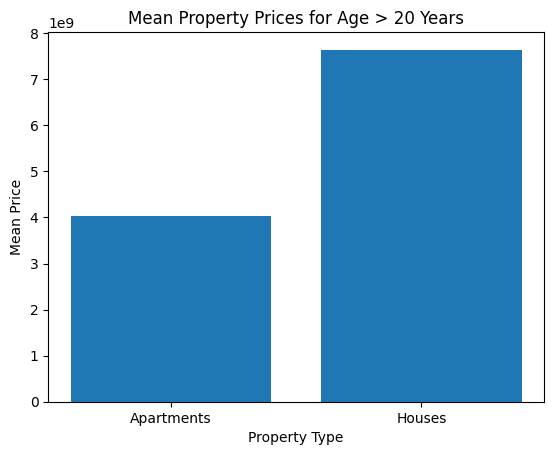

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for apartments and houses with age > 20
apartments_age_gt_20_data = data[(data['type'] == 0) & (data['age'] > 20)]
houses_age_gt_20_data = data[(data['type'] == 1) & (data['age'] > 20)]

# Calculate the mean prices for apartments and houses
mean_apartments_price = apartments_age_gt_20_data['price'].mean()
mean_houses_price = houses_age_gt_20_data['price'].mean()

# Create a bar plot
categories = ['Apartments', 'Houses']
mean_prices = [mean_apartments_price, mean_houses_price]

plt.bar(categories, mean_prices)
plt.xlabel('Property Type')
plt.ylabel('Mean Price')
plt.title('Mean Property Prices for Age > 20 Years')
plt.show()


In [ ]:
# drop the original 'age' column if you don't need it anymore
# data.drop(columns=['age'], inplace=True)
# data

In [ ]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


# Select the 'latitude' and 'longitude' columns
coordinates = data[['latitude', 'longitude']]

# Standardize the coordinates (scaling)
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)

# Initialize DBSCAN
epsilon = 0.1  # Epsilon value for the neighborhood
min_samples = 5  # Minimum number of samples in a neighborhood to be considered a core point
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples, metric='euclidean')

# Fit DBSCAN to the scaled coordinates
labels = dbscan.fit_predict(scaled_coordinates)

# Add the cluster labels back to the original DataFrame
data['cluster_label'] = labels

# Display the resulting clusters
data[['latitude', 'longitude', 'cluster_label']]


,latitude,longitude,cluster_label
0,36.373776,59.475820,0
1,36.327670,59.548380,0
2,36.310605,59.504477,0
3,36.400540,59.388382,1
4,36.373776,59.475820,0
...,...,...,...
46061,36.328550,59.513390,0
46062,36.371452,59.484620,0
46063,36.319780,59.494770,0
46064,36.349873,59.488426,0


In [ ]:
data["cluster_label"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, -1, 15,  8, 11, 10,  9, 13, 14, 12])

In [ ]:
# Filter the data to select noise points (outliers)
outliers = data[data['cluster_label'] == -1]

# Display or analyze the outlier points
outliers[['latitude', 'longitude']]

,latitude,longitude
1601,36.355717,59.564594
2243,36.335896,59.437214
3012,36.220737,59.891020
3441,36.394962,59.635406
3609,36.269955,59.550830
...,...,...
44582,36.374650,59.635784
44954,36.254910,59.653580
45413,36.458714,59.485836
45664,36.248910,60.127060


Deleting them

In [ ]:
data = data[data['cluster_label'] != -1]
data

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio,cluster_label
0,0,73.0,36.373776,59.475820,11,1,2.0,2.200000e+09,12,9,7,3,13,0.027397,0
1,0,100.0,36.327670,59.548380,7,1,2.0,4.800000e+09,2,13,4,5,7,0.020000,0
2,0,140.0,36.310605,59.504477,0,2,2.0,1.020000e+10,9,18,8,6,3,0.014286,0
3,0,65.0,36.400540,59.388382,6,4,1.0,8.700000e+08,12,9,7,1,7,0.015385,1
4,0,200.0,36.373776,59.475820,0,0,3.0,5.350000e+09,12,9,7,7,3,0.015000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46061,0,110.0,36.328550,59.513390,4,4,2.0,5.100000e+09,11,20,10,4,3,0.018182,0
46062,0,110.0,36.371452,59.484620,4,3,2.0,4.100000e+09,12,9,7,4,3,0.018182,0
46063,0,140.0,36.319780,59.494770,15,1,2.0,5.500000e+09,9,18,8,3,13,0.014286,0
46064,0,130.0,36.349873,59.488426,4,2,3.0,4.100000e+09,10,5,2,3,3,0.023077,0


In [ ]:
numeric_data = data[["area",	"latitude",	"longitude",	"price"]]

numeric_data.corr()

,area,latitude,longitude,price
area,1.000000,-0.065434,-0.072019,0.118362
latitude,-0.065434,1.000000,-0.727036,-0.024982
longitude,-0.072019,-0.727036,1.000000,-0.009478
price,0.118362,-0.024982,-0.009478,1.000000


In [ ]:
numeric_data_1 = data[["area",	"latitude",	"longitude",	"price"]]

numeric_data_1.corr()

,area,latitude,longitude,price
area,1.000000,-0.065434,-0.072019,0.118362
latitude,-0.065434,1.000000,-0.727036,-0.024982
longitude,-0.072019,-0.727036,1.000000,-0.009478
price,0.118362,-0.024982,-0.009478,1.000000


***Finding outliers in Categorical data ***

In [ ]:
data["type"].unique()

array([0, 1])

In [ ]:
data

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio,cluster_label
0,0,73.0,36.373776,59.475820,11,1,2.0,2.200000e+09,12,9,7,3,13,0.027397,0
1,0,100.0,36.327670,59.548380,7,1,2.0,4.800000e+09,2,13,4,5,7,0.020000,0
2,0,140.0,36.310605,59.504477,0,2,2.0,1.020000e+10,9,18,8,6,3,0.014286,0
3,0,65.0,36.400540,59.388382,6,4,1.0,8.700000e+08,12,9,7,1,7,0.015385,1
4,0,200.0,36.373776,59.475820,0,0,3.0,5.350000e+09,12,9,7,7,3,0.015000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46061,0,110.0,36.328550,59.513390,4,4,2.0,5.100000e+09,11,20,10,4,3,0.018182,0
46062,0,110.0,36.371452,59.484620,4,3,2.0,4.100000e+09,12,9,7,4,3,0.018182,0
46063,0,140.0,36.319780,59.494770,15,1,2.0,5.500000e+09,9,18,8,3,13,0.014286,0
46064,0,130.0,36.349873,59.488426,4,2,3.0,4.100000e+09,10,5,2,3,3,0.023077,0


<Axes: xlabel='bedrooms'>

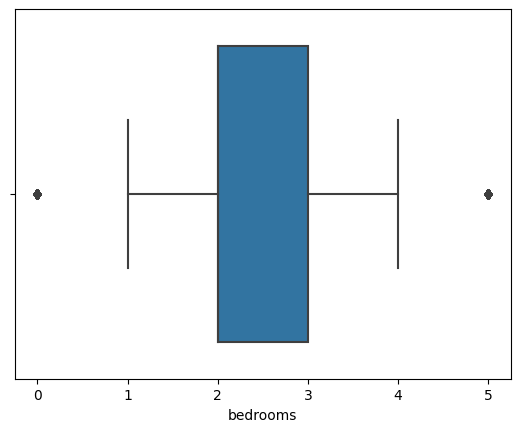

In [ ]:
sns.boxplot(x = data["bedrooms"])

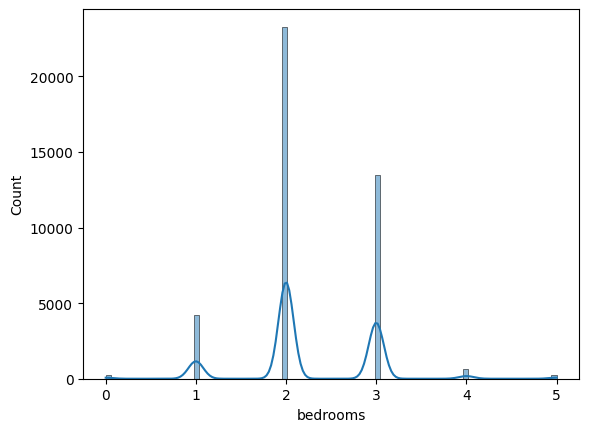

In [ ]:
sns.histplot(data['bedrooms'], kde=True)
plt.show()

In [ ]:
# Define the bin edges and labels
bin_edges = [-1, 1, 2, 3, 7]  # Define the age bin edges
bin_labels = ['1', '2', '3', '6']  # Labels for the bins

# Create a new column 'age_group' with age bins
data['bedroom_group'] = pd.cut(data['bedrooms'], bins=bin_edges, labels=bin_labels)


# Display the modified DataFrame
data

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio,cluster_label,bedroom_group
0,0,73.0,36.373776,59.475820,11,1,2.0,2.200000e+09,12,9,7,3,13,0.027397,0,2
1,0,100.0,36.327670,59.548380,7,1,2.0,4.800000e+09,2,13,4,5,7,0.020000,0,2
2,0,140.0,36.310605,59.504477,0,2,2.0,1.020000e+10,9,18,8,6,3,0.014286,0,2
3,0,65.0,36.400540,59.388382,6,4,1.0,8.700000e+08,12,9,7,1,7,0.015385,1,1
4,0,200.0,36.373776,59.475820,0,0,3.0,5.350000e+09,12,9,7,7,3,0.015000,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46061,0,110.0,36.328550,59.513390,4,4,2.0,5.100000e+09,11,20,10,4,3,0.018182,0,2
46062,0,110.0,36.371452,59.484620,4,3,2.0,4.100000e+09,12,9,7,4,3,0.018182,0,2
46063,0,140.0,36.319780,59.494770,15,1,2.0,5.500000e+09,9,18,8,3,13,0.014286,0,2
46064,0,130.0,36.349873,59.488426,4,2,3.0,4.100000e+09,10,5,2,3,3,0.023077,0,3


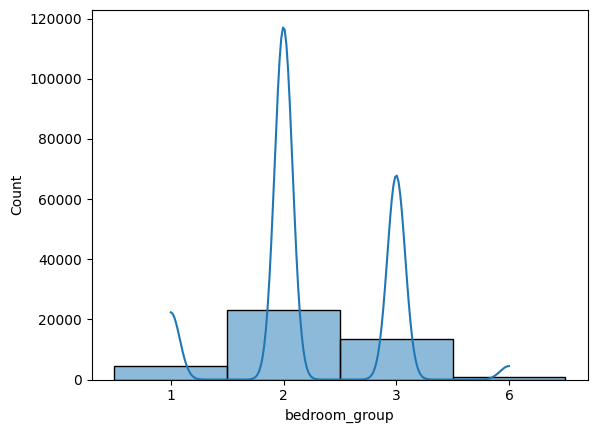

In [ ]:
sns.histplot(data['bedroom_group'], kde=True)
plt.show()

In [ ]:
data["bedroom_group"].isna().sum()

0

In [ ]:
# data.drop(columns=["bedrooms"], inplace=True)
# data


In [ ]:
# import pandas as pd


# # Filter and count properties with more than 5 rooms
# count_more_than_5_rooms = data[data['bedrooms'] > 10].shape[0]

# print(f"Number of properties with more than 10 rooms: {count_more_than_5_rooms}")

In [ ]:
# data = data[data['bedrooms'] <= 6]
# data

In [ ]:
# sns.boxplot(x = data["bedrooms"])

In [ ]:
numeric_data_1 = data[["area",	"latitude",	"longitude","price"]]

numeric_data_1.corr()

,area,latitude,longitude,price
area,1.000000,-0.065434,-0.072019,0.118362
latitude,-0.065434,1.000000,-0.727036,-0.024982
longitude,-0.072019,-0.727036,1.000000,-0.009478
price,0.118362,-0.024982,-0.009478,1.000000


In [ ]:
# sns.boxplot(x = data["bedrooms"])

In [ ]:
null_count = data['price'].isnull().sum()
null_count

0

In [ ]:


# Assuming 'price' is the name of the column containing prices
num_zero_prices = (data['price'] == 0).sum()

print("Number of instances with a price of 0:", num_zero_prices)

Number of instances with a price of 0: 0


In [ ]:
# Drop rows with NaN or None values in the specified column
# data_1 = data_.dropna(subset=['price'])

It seems that my mapping affects the prediction; therefore I tried to map them **based on PRICES**

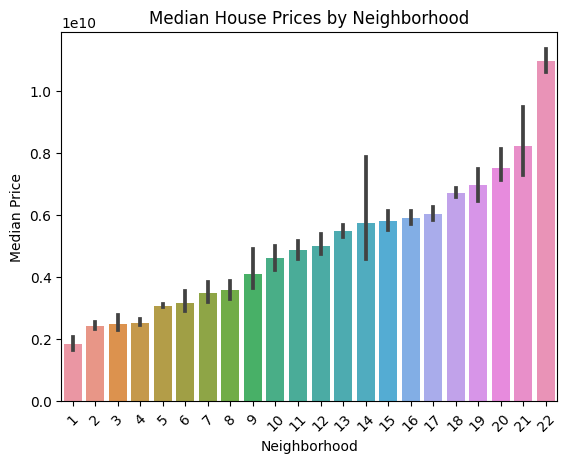

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='encoded_neighborhoods', y='price', data=data, estimator=np.mean)
plt.xticks(rotation=45)
plt.xlabel('Neighborhood')
plt.ylabel('Median Price')
plt.title('Median House Prices by Neighborhood')
plt.show()

In [ ]:
# mean_prices_by_neighborhood = data.groupby('encoded_neighborhoods')['price'].mean().sort_values()
# mean_prices_by_neighborhood

In [ ]:
# new_neighborhood_mapping = {neighborhood: code for code, neighborhood in enumerate(mean_prices_by_neighborhood.index, start=1)}
# new_neighborhood_mapping

In [ ]:
# data['neighborhood_code'] = data['encoded_neighborhoods'].map(new_neighborhood_mapping)

Its time  to repeat it for districts

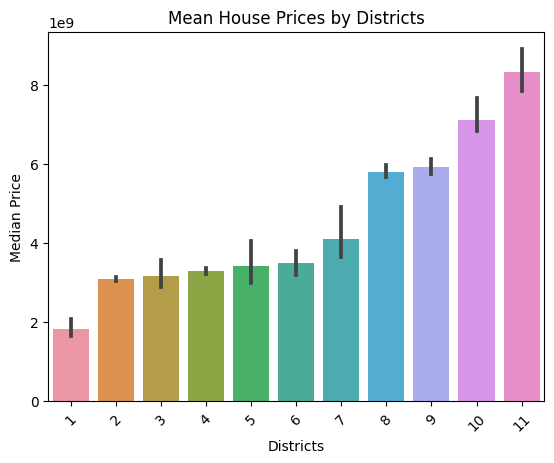

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='new_encoded_districts', y='price', data=data, estimator=np.mean)
plt.xticks(rotation=45)
plt.xlabel('Districts')
plt.ylabel('Median Price')
plt.title('Mean House Prices by Districts')
plt.show()

In [ ]:
# mean_prices_by_district = data.groupby('encoded_districts')['price'].mean().sort_values()
# mean_prices_by_district

In [ ]:
# new_district_mapping = {district: code for code, district in enumerate(mean_prices_by_district.index, start=1)}
# new_district_mapping

In [ ]:
# data['district_code'] = data['encoded_districts'].map(new_district_mapping)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# sns.barplot(x='district_code', y='price', data=data, estimator=np.mean)
# plt.xticks(rotation=45)
# plt.xlabel('Districts')
# plt.ylabel('Median Price')
# plt.title('Mean House Prices by Districts')
# plt.show()

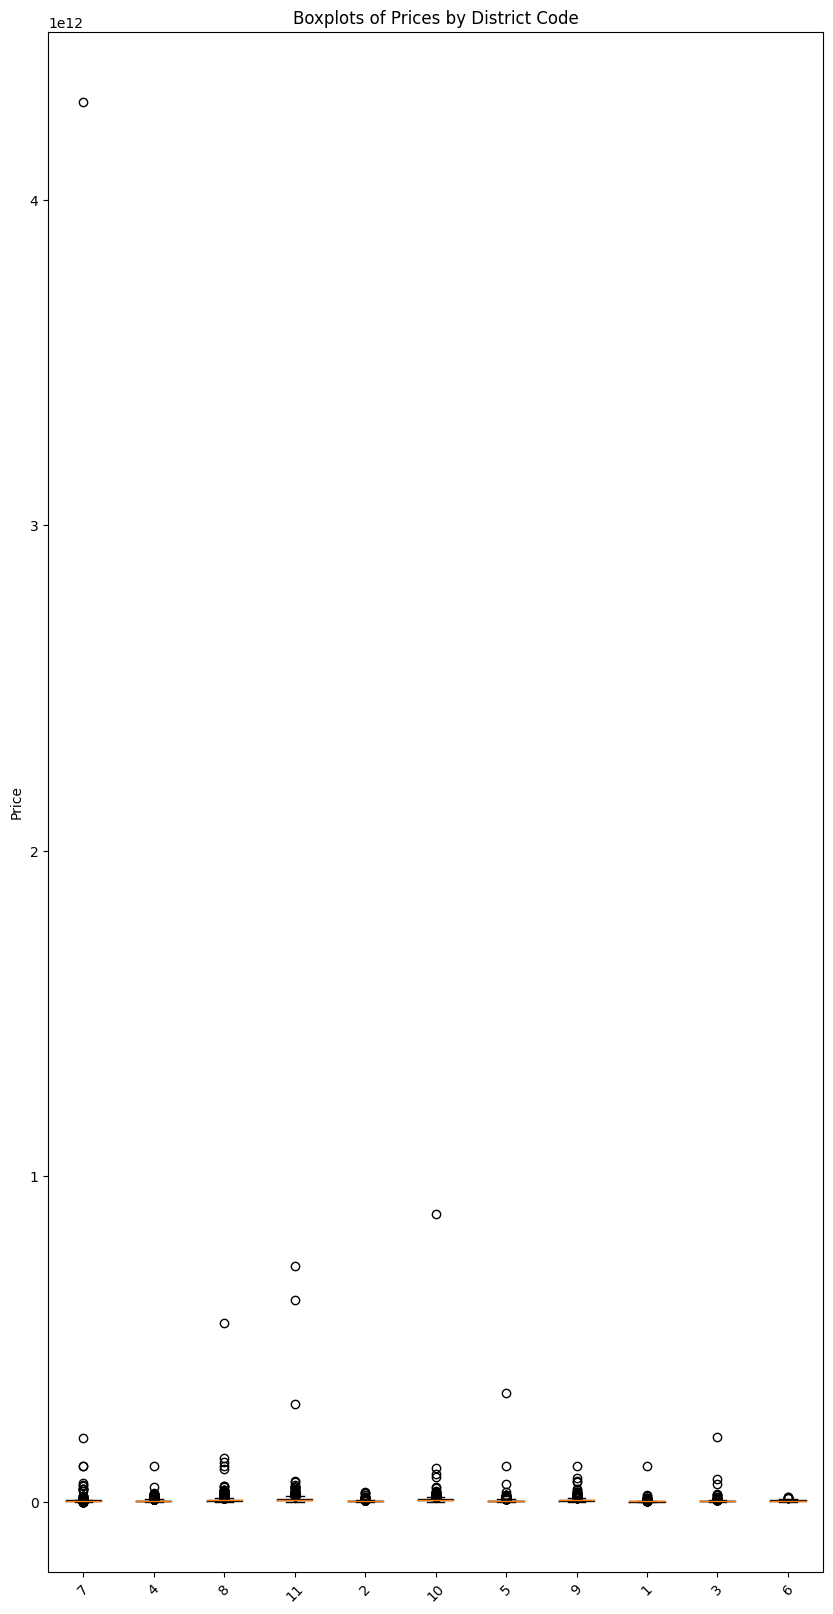

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd



# Create a horizontal boxplot for the "price" variable grouped by "district_code"
plt.figure(figsize=(10, 20))  # Adjust figsize as needed
plt.boxplot([data[data['new_encoded_districts'] == district]['price'] for district in data['new_encoded_districts'].unique()])

# Set labels for each boxplot on the horizontal axis
plt.xticks(range(1, len(data['new_encoded_districts'].unique()) + 1), data['new_encoded_districts'].unique(), rotation=45)
plt.ylabel('Price')
plt.title('Boxplots of Prices by District Code')

# Show the plot
plt.show()





In [ ]:
import pandas as pd

# Assuming you have your data in a DataFrame
# data = pd.read_csv('your_data.csv')

# Specify the district_code and the price threshold for outlier removal
district_code_to_remove = 7
price_threshold = 1  # Set your threshold here

# Create a boolean mask to identify rows with the specified district_code and price above the threshold
mask = (data['new_encoded_districts'] == district_code_to_remove) & (data['price'] > price_threshold)

# Remove the identified outlier rows from the DataFrame
data_cleaned = data[~mask]

# data_cleaned now contains the data with the outlier(s) removed for the specified district_code


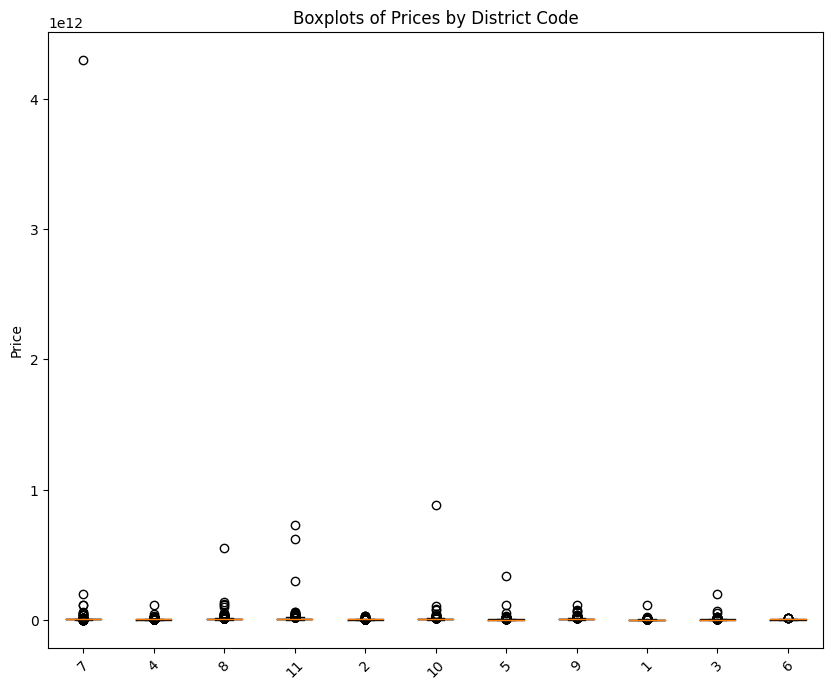

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data in a DataFrame
# df = pd.read_csv('your_data.csv')

# Create a horizontal boxplot for the "price" variable grouped by "district_code"
plt.figure(figsize=(10, 8))  # Adjust figsize as needed
plt.boxplot([data[data['new_encoded_districts'] == district]['price'] for district in data['new_encoded_districts'].unique()])

# Set labels for each boxplot on the horizontal axis
plt.xticks(range(1, len(data['new_encoded_districts'].unique()) + 1), data['new_encoded_districts'].unique(), rotation=45)
plt.ylabel('Price')
plt.title('Boxplots of Prices by District Code')

# Show the plot
plt.show()


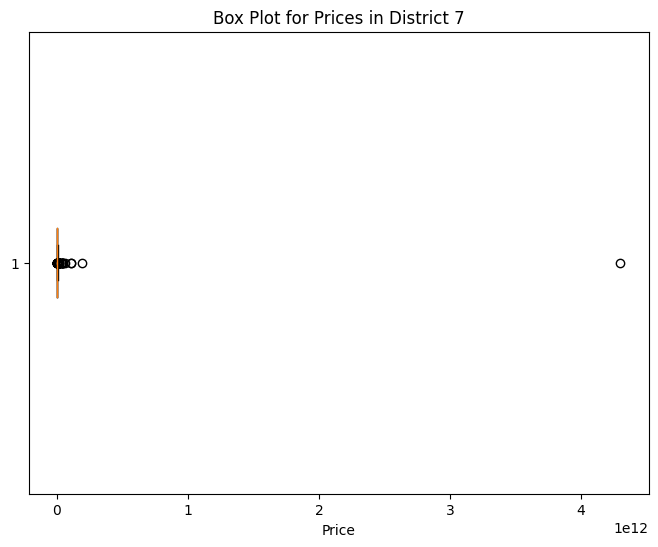

In [ ]:

# Specify the district_code for which you want to create the box plot
district_code_to_plot = 7

# Filter the data to select only rows with the specified district_code
district_data = data[data['new_encoded_districts'] == district_code_to_plot]

# Create a box plot for the "price" variable in district_code 7
plt.figure(figsize=(8, 6))
plt.boxplot(district_data['price'], vert=False)
plt.title(f'Box Plot for Prices in District {district_code_to_plot}')
plt.xlabel('Price')
plt.show()


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'data' with a 'district_code' and 'price' column

# Get a list of unique district codes in your data
unique_district_codes = data['new_encoded_districts'].unique()

# Initialize a list to store the indexes of all outliers
all_outliers_indexes = []

# Loop through each district code and find outliers
for district_code_to_search in unique_district_codes:
    # Filter the data to select only rows with the current district_code
    district_data = data[data['new_encoded_districts'] == district_code_to_search]

    # Extract the price column
    price_column = district_data['price']

    # Calculate quartiles and IQR
    Q1 = price_column.quantile(0.25)
    Q3 = price_column.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_threshold = Q1 - 3 * IQR
    upper_threshold = Q3 + 3 * IQR

    # Identify potential outliers
    potential_outliers = price_column[(price_column < lower_threshold) | (price_column > upper_threshold)]

    # Append the indexes of potential_outliers to the all_outliers_indexes list
    all_outliers_indexes.extend(potential_outliers.index)

# Drop the rows with all outliers from the original data DataFrame
data = data.drop(all_outliers_indexes)

# Now, the 'data' DataFrame contains your original data with rows removed where all outliers are present.


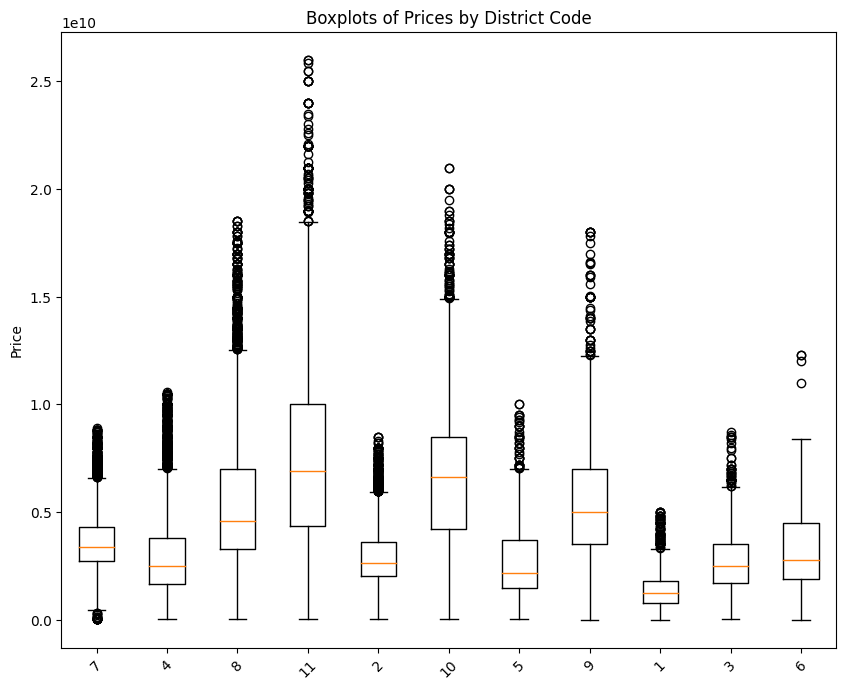

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data in a DataFrame
# df = pd.read_csv('your_data.csv')

# Create a horizontal boxplot for the "price" variable grouped by "district_code"
plt.figure(figsize=(10, 8))  # Adjust figsize as needed
plt.boxplot([data[data['new_encoded_districts'] == district]['price'] for district in data['new_encoded_districts'].unique()])

# Set labels for each boxplot on the horizontal axis
plt.xticks(range(1, len(data['new_encoded_districts'].unique()) + 1), data['new_encoded_districts'].unique(), rotation=45)
plt.ylabel('Price')
plt.title('Boxplots of Prices by District Code')

# Show the plot
plt.show()

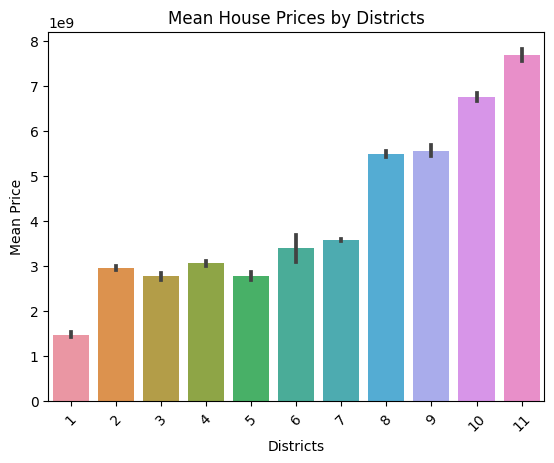

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='new_encoded_districts', y='price', data=data, estimator=np.mean)
plt.xticks(rotation=45)
plt.xlabel('Districts')
plt.ylabel('Mean Price')
plt.title('Mean House Prices by Districts')
plt.show()

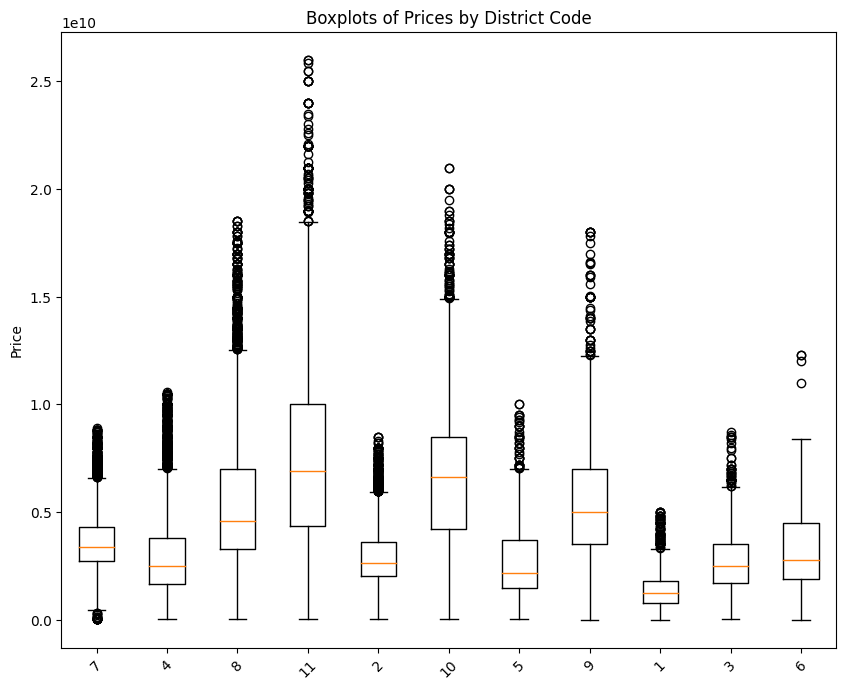

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have your data in a DataFrame
# df = pd.read_csv('your_data.csv')

# Create a horizontal boxplot for the "price" variable grouped by "district_code"
plt.figure(figsize=(10, 8))  # Adjust figsize as needed
plt.boxplot([data[data['new_encoded_districts'] == district]['price'] for district in data['new_encoded_districts'].unique()])

# Set labels for each boxplot on the horizontal axis
plt.xticks(range(1, len(data['new_encoded_districts'].unique()) + 1), data['new_encoded_districts'].unique(), rotation=45)
plt.ylabel('Price')
plt.title('Boxplots of Prices by District Code')

# Show the plot
plt.show()





In [ ]:
# mean_prices_by_district_code = data.groupby('district_code')['price'].mean().sort_values()
# mean_prices_by_district_code

In [ ]:
# new_district_mapping = {district: code for code, district in enumerate(mean_prices_by_district_code.index, start=1)}
# new_district_mapping

In [ ]:
# data['district_code'] = data['district_code'].map(new_district_mapping)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Features and target variable
features = ["type", "area", "latitude", "longitude", "floor", "encoded_districts", "encoded_neighborhoods", "new_encoded_districts", "description_score", "age", "bedrooms_to_area_ratio","bedrooms"]

# Select features and target from the DataFrame
X = data[features]


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(X_scaled, columns=features)

# Display the first few rows of the scaled DataFrame
scaled_df.head()

,type,area,latitude,longitude,floor,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age,bedrooms_to_area_ratio,bedrooms
0,0.0,0.264317,0.795543,0.266278,0.064516,0.250000,0.380952,0.6,0.214286,0.354839,0.856164,0.4
1,0.0,0.383260,0.579226,0.485572,0.064516,0.022727,0.571429,0.3,0.357143,0.225806,0.625000,0.4
2,0.0,0.559471,0.499161,0.352885,0.096774,0.181818,0.809524,0.7,0.428571,0.000000,0.446429,0.4
3,0.0,0.229075,0.921109,0.002019,0.161290,0.250000,0.380952,0.6,0.071429,0.193548,0.480769,0.2
4,0.0,0.823789,0.795543,0.266278,0.032258,0.250000,0.380952,0.6,0.500000,0.000000,0.468750,0.6


<Axes: xlabel='price'>

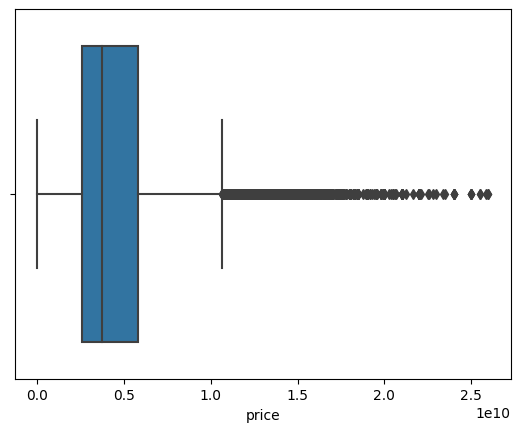

In [ ]:
sns.boxplot(x = data["price"])

In [ ]:
import pandas as pd


# Assuming 'price' is the name of the column containing prices
price_column = data['price']

# Calculate quartiles and IQR
Q1 = price_column.quantile(0.25)
Q3 = price_column.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_threshold = Q1 - 3 * IQR
upper_threshold = Q3 + 3 * IQR

# Identify potential outliers
potential_outliers = price_column[(price_column < lower_threshold) | (price_column > upper_threshold)]

# Print the potential outliers
print("Potential Outliers:")
potential_outliers


Potential Outliers:


262      1.630000e+10
295      1.750000e+10
480      1.600000e+10
600      1.800000e+10
654      1.740000e+10
             ...     
45069    1.732500e+10
45134    1.600000e+10
45325    1.600000e+10
45381    1.580000e+10
45911    1.800000e+10
Name: price, Length: 404, dtype: float64

<Axes: xlabel='price'>

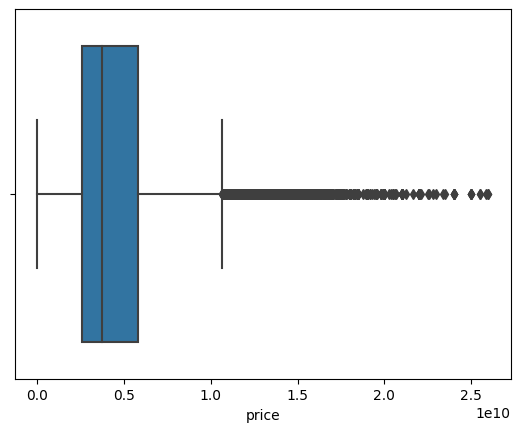

In [ ]:
sns.boxplot(x = data["price"])

In [ ]:
# Remove potential outliers from the DataFrame
data = data[~data.index.isin(potential_outliers.index)]

<Axes: xlabel='price'>

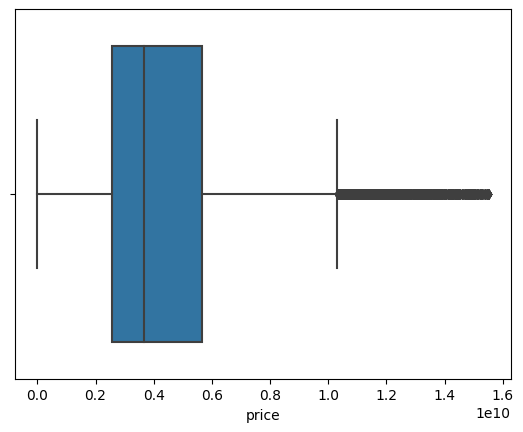

In [ ]:
sns.boxplot(x = data["price"])

In [ ]:
# numeric_data_2 = scaled_df[["type", "area", "latitude", "longitude", "floor", "price", "encoded_districts", "encoded_neighborhoods", "new_encoded_districts", "description_score", "age_group", "bedrooms_to_area_ratio"]]

# numeric_data_2.corr()

In [ ]:
fg = data['bedroom_group'].isna().sum()
fg


0

In [ ]:
# numeric_data_2 = scaled_df[["type", "area", "latitude", "longitude", "floor", "price", "encoded_districts", "encoded_neighborhoods", "new_encoded_districts", "description_score", "age_group", "bedrooms_to_area_ratio"]]

# numeric_data_2.corr()

In [ ]:
mask = (data['price'] == 0)

# Use the mask to drop rows with price equal to 0
data = data[~mask]

In [ ]:
data

,type,area,latitude,longitude,age,floor,bedrooms,price,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age_group,bedrooms_to_area_ratio,cluster_label,bedroom_group
0,0,73.0,36.373776,59.475820,11,1,2.0,2.200000e+09,12,9,7,3,13,0.027397,0,2
1,0,100.0,36.327670,59.548380,7,1,2.0,4.800000e+09,2,13,4,5,7,0.020000,0,2
2,0,140.0,36.310605,59.504477,0,2,2.0,1.020000e+10,9,18,8,6,3,0.014286,0,2
3,0,65.0,36.400540,59.388382,6,4,1.0,8.700000e+08,12,9,7,1,7,0.015385,1,1
4,0,200.0,36.373776,59.475820,0,0,3.0,5.350000e+09,12,9,7,7,3,0.015000,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46061,0,110.0,36.328550,59.513390,4,4,2.0,5.100000e+09,11,20,10,4,3,0.018182,0,2
46062,0,110.0,36.371452,59.484620,4,3,2.0,4.100000e+09,12,9,7,4,3,0.018182,0,2
46063,0,140.0,36.319780,59.494770,15,1,2.0,5.500000e+09,9,18,8,3,13,0.014286,0,2
46064,0,130.0,36.349873,59.488426,4,2,3.0,4.100000e+09,10,5,2,3,3,0.023077,0,3


In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Load your clean housing data into a DataFrame
# # data = pd.read_csv('clean_housing_data.csv')

# # Assume your target variable is 'price' and features include 'number_of_rooms', 'latitude', 'longitude'
# features = ["type", "area", "latitude", "longitude", "floor", "encoded_districts", "encoded_neighborhoods", "new_encoded_districts", "description_score", "age_group", "bedrooms_to_area_ratio"]

# target = 'price'

# # Split data into features (X) and target variable (y)
# X = scaled_df[features]
# y = scaled_df[target]

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train a Linear Regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Evaluate the model's performance using Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, predictions)
# print(f"Mean Squared Error: {mse}")


KeyError: ignored

In [ ]:

# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt

# # Calculate R-squared
# r2 = r2_score(y_test, predictions)
# print(f"R-squared: {r2}")

# # Scatter plot to visualize predictions
# plt.scatter(y_test, predictions)
# plt.xlabel("Actual Prices")
# plt.ylabel("Predicted Prices")
# plt.title("Actual vs. Predicted Prices")
# plt.show()

In [ ]:
# # Replace zero values with the mean of non-zero values in y_test
# y_test = y_test.replace(0, y_test[y_test != 0].mean())

# # Replace zero values in y (original target values) with the mean of non-zero values in y
# y = y.replace(0, y[y != 0].mean())


In [ ]:
# # Calculate the absolute percentage error for each prediction
# absolute_percentage_errors = abs((y_test - predictions) / y_test) * 100

# # Calculate the Mean Absolute Percentage Error (MAPE)
# mape = absolute_percentage_errors.mean()

# print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

In [ ]:
# from sklearn.metrics import mean_absolute_error

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, predictions)
# print(f"Mean Absolute Error (MAE): {mae:.2f}")


In [ ]:

# import numpy as np

# # Calculate the IQR of predictions
# iqr = np.percentile(predictions, 75) - np.percentile(predictions, 25)
# print(f"IQR of Predictions: {iqr}")




# Adding ICDS test data

In [ ]:
# Access the file
file_path = "/content/drive/MyDrive/ICDS_DATA/final_test_3.csv"


In [ ]:
n_data = pd.read_csv(file_path)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Features and target variable
features = ["type", "area", "latitude", "longitude", "floor", "encoded_districts", "encoded_neighborhoods", "new_encoded_districts", "description_score", "age","bedrooms"]

# Select features and target from the DataFrame
X = n_data[features]


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
new_data = pd.DataFrame(X_scaled, columns=features)

# Display the first few rows of the scaled DataFrame
new_data.head()

,type,area,latitude,longitude,floor,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age,bedrooms
0,1.0,0.500000,0.233345,0.590851,0.076923,0.136364,0.619048,0.4,0.142857,0.064516,0.6
1,0.0,0.192308,0.667372,0.226965,0.153846,0.250000,0.380952,0.6,0.428571,0.129032,0.4
2,0.0,0.200000,0.613229,0.334659,0.153846,0.204545,0.190476,0.1,0.214286,0.741935,0.4
3,0.0,0.173077,0.667372,0.226965,0.384615,0.250000,0.380952,0.6,0.285714,0.225806,0.4
4,0.0,0.442308,0.506500,0.211856,0.307692,0.181818,0.523810,0.7,0.357143,0.000000,0.4


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your clean housing data into a DataFrame
# data = pd.read_csv('clean_housing_data.csv')

# Assume your target variable is 'price' and features include 'number_of_rooms', 'latitude', 'longitude'
features = ["type", "area", "latitude", "longitude", "floor", "encoded_districts", "encoded_neighborhoods", "new_encoded_districts", "description_score", "age","bedrooms"]

target = 'price'

# Split data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X, y)  # Train on the entire dataset

# Assuming 'new_data' contains your new dataset
X_new = new_data[features]

# Make predictions on the new data
predictions_new_2 = model.predict(X_new)

# Evaluate the model's performance on the new data using Mean Squared Error (MSE)
# Since 'new_data' doesn't have true target values (y), you can't calculate MSE directly.
# Instead, you can print or use the 'predictions_new' as needed.
predictions_new_2


array([3.56507400e+11, 3.53671937e+11, 3.53712639e+11, ...,
       3.54672822e+11, 3.54276868e+11, 3.55347443e+11])

In [ ]:
# Create a new DataFrame with predictions aligned with original data
my_predictions = pd.DataFrame(predictions_new_2, columns=['price'])

# Concatenate 'new_data' and 'predictions_df' along columns (axis=1)
new_predictions = pd.concat([new_data, my_predictions], axis=1)

In [ ]:
new_predictions

,type,area,latitude,longitude,floor,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age,bedrooms,price
0,1.0,0.500000,0.233345,0.590851,0.076923,0.136364,0.619048,0.4,0.142857,0.064516,0.6,3.565074e+11
1,0.0,0.192308,0.667372,0.226965,0.153846,0.250000,0.380952,0.6,0.428571,0.129032,0.4,3.536719e+11
2,0.0,0.200000,0.613229,0.334659,0.153846,0.204545,0.190476,0.1,0.214286,0.741935,0.4,3.537126e+11
3,0.0,0.173077,0.667372,0.226965,0.384615,0.250000,0.380952,0.6,0.285714,0.225806,0.4,3.536635e+11
4,0.0,0.442308,0.506500,0.211856,0.307692,0.181818,0.523810,0.7,0.357143,0.000000,0.4,3.547021e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
4605,0.0,0.146154,0.613229,0.334659,0.230769,0.204545,0.190476,0.1,0.357143,0.225806,0.4,3.537299e+11
4606,0.0,0.538462,0.667372,0.226965,0.153846,0.250000,0.380952,0.6,0.285714,0.129032,0.6,3.537266e+11
4607,0.0,0.384615,0.504288,0.252146,0.461538,0.181818,0.523810,0.7,0.571429,0.032258,0.6,3.546728e+11
4608,0.0,0.461538,0.525169,0.387437,0.230769,0.227273,0.904762,0.9,0.571429,0.193548,0.6,3.542769e+11


In [ ]:
# Write the data to a new CSV file
new_predictions.to_csv('final_upload_3.csv', index=False)

In [ ]:
# Download the new CSV file
files.download('final_upload_3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Neural Network model

In [ ]:

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_percentage_error
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers


# # Define your features and target variable
# features = ["type", "area", "latitude", "longitude", "floor", "encoded_districts", "encoded_neighborhoods", "new_encoded_districts", "description_score", "age", "bedrooms_to_area_ratio","bedrooms"]
# target = 'price'

# # Split data into features (X) and target variable (y)
# X = data[features]
# y = data[target]

# # Normalize features using StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Build a neural network model using Keras
# model = keras.Sequential([
#     layers.Input(shape=(X_train.shape[1],)),
#     # layers.Dense(1024, activation='relu'),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(256, activation='relu'),
#     # layers.Dropout(0.5),  # Add dropout for regularization
#     layers.Dense(128, activation='relu'),
#     # layers.Dropout(0.5),  # Add dropout for regularization
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# # Make predictions on the test set
# predictions = model.predict(X_test)

# # Calculate MAPE
# mape = mean_absolute_percentage_error(y_test, predictions)
# print(f"Mean Absolute Percentage Error (MAPE): {mape*100:.2f}%")


In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Define your features and target variable
# features = ["type", "area", "latitude", "longitude", "floor", "encoded_districts", "encoded_neighborhoods", "new_encoded_districts", "description_score", "age","bedrooms"]
# target = 'price'

# # Split data into features (X) and target variable (y)
# X = data[features]
# y = data[target]

# # Normalize features using StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Build a neural network model using Keras
# model = keras.Sequential([
#     layers.Input(shape=(X.shape[1],)),
#     layers.Dense(512, activation='relu'),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(32, activation='relu'),
#     layers.Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model on the entire dataset
# model.fit(X, y, epochs=50, batch_size=10, verbose=1)

# # Assuming 'new_data' contains your new dataset
# X_new = new_data[features]

# # Normalize the new data using the same scaler used for training data
# X_new = scaler.transform(X_new)

# # Make predictions on the new data
# predictions_new = model.predict(X_new)

# # Print or use the predictions as needed
# print(predictions_new)



Epoch 1/50
4125/4125 [==============================] - 25s 6ms/step - loss: 3775739147579293696.0000
Epoch 2/50
4125/4125 [==============================] - 23s 6ms/step - loss: 1433301092858331136.0000
Epoch 3/50
4125/4125 [==============================] - 22s 5ms/step - loss: 1402096540545187840.0000
Epoch 4/50
4125/4125 [==============================] - 23s 6ms/step - loss: 1383409515797413888.0000
Epoch 5/50
4125/4125 [==============================] - 26s 6ms/step - loss: 1373847887804366848.0000
Epoch 6/50
4125/4125 [==============================] - 22s 5ms/step - loss: 1366212466744229888.0000
Epoch 7/50
4125/4125 [==============================] - 24s 6ms/step - loss: 1359307671160750080.0000
Epoch 8/50
4125/4125 [==============================] - 22s 5ms/step - loss: 1354360281152618496.0000
Epoch 9/50
4125/4125 [==============================] - 22s 5ms/step - loss: 1348689687371317248.0000
Epoch 10/50
4125/4125 [==============================] - 22s 5ms/step - loss: 1345

R-squared: 0.817505770179754


ValueError: ignored

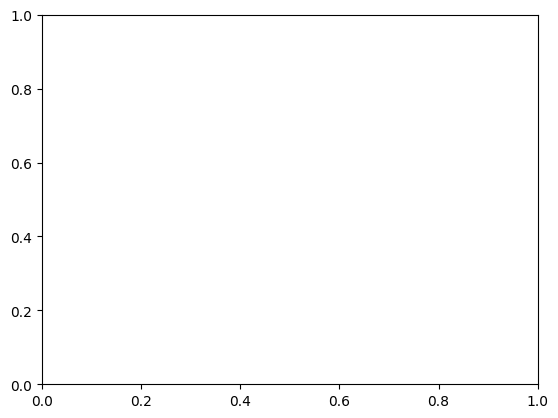

In [ ]:

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

# Scatter plot to visualize predictions
plt.scatter(y_test, predictions_new)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [ ]:

# Assuming 'new_data' contains your new dataset and 'predictions_new' contains the predicted prices

# Add a new column 'predicted_price' to 'new_data' with the predictions
new_data['price'] = predictions_new

# Now, 'new_data' contains the 'predicted_price' column with the predicted values
new_data


,type,area,latitude,longitude,floor,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age,bedrooms,predicted_price,price
0,1.0,0.500000,0.233345,0.590851,0.076923,0.136364,0.619048,0.4,0.142857,0.064516,0.6,6.649572e+11,6.649572e+11
1,0.0,0.192308,0.667372,0.226965,0.153846,0.250000,0.380952,0.6,0.428571,0.129032,0.4,6.723545e+11,6.723545e+11
2,0.0,0.200000,0.613229,0.334659,0.153846,0.204545,0.190476,0.1,0.214286,0.741935,0.4,6.701843e+11,6.701843e+11
3,0.0,0.173077,0.667372,0.226965,0.384615,0.250000,0.380952,0.6,0.285714,0.225806,0.4,6.723305e+11,6.723305e+11
4,0.0,0.442308,0.506500,0.211856,0.307692,0.181818,0.523810,0.7,0.357143,0.000000,0.4,6.715758e+11,6.715758e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,0.0,0.146154,0.613229,0.334659,0.230769,0.204545,0.190476,0.1,0.357143,0.225806,0.4,6.702504e+11,6.702504e+11
4606,0.0,0.538462,0.667372,0.226965,0.153846,0.250000,0.380952,0.6,0.285714,0.129032,0.6,6.725712e+11,6.725712e+11
4607,0.0,0.384615,0.504288,0.252146,0.461538,0.181818,0.523810,0.7,0.571429,0.032258,0.6,6.712208e+11,6.712208e+11
4608,0.0,0.461538,0.525169,0.387437,0.230769,0.227273,0.904762,0.9,0.571429,0.193548,0.6,6.693335e+11,6.693335e+11


In [ ]:

# Create a new DataFrame with predictions aligned with original data
predictions_df = pd.DataFrame(predictions_new, columns=['predicted_price'])

# Concatenate 'new_data' and 'predictions_df' along columns (axis=1)
new_data_with_predictions = pd.concat([new_data, predictions_df], axis=1)

In [ ]:
# # Assuming 'new_data' is your DataFrame and you want to drop the 'predicted_price' column
# new_data.drop(columns=['predicted_price'], inplace=True)
# new_data

KeyError: ignored

In [ ]:
new_data_with_predictions

,type,area,latitude,longitude,floor,encoded_districts,encoded_neighborhoods,new_encoded_districts,description_score,age,bedrooms,price,predicted_price
0,1.0,0.500000,0.233345,0.590851,0.076923,0.136364,0.619048,0.4,0.142857,0.064516,0.6,6.649572e+11,6.649572e+11
1,0.0,0.192308,0.667372,0.226965,0.153846,0.250000,0.380952,0.6,0.428571,0.129032,0.4,6.723545e+11,6.723545e+11
2,0.0,0.200000,0.613229,0.334659,0.153846,0.204545,0.190476,0.1,0.214286,0.741935,0.4,6.701843e+11,6.701843e+11
3,0.0,0.173077,0.667372,0.226965,0.384615,0.250000,0.380952,0.6,0.285714,0.225806,0.4,6.723305e+11,6.723305e+11
4,0.0,0.442308,0.506500,0.211856,0.307692,0.181818,0.523810,0.7,0.357143,0.000000,0.4,6.715758e+11,6.715758e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,0.0,0.146154,0.613229,0.334659,0.230769,0.204545,0.190476,0.1,0.357143,0.225806,0.4,6.702504e+11,6.702504e+11
4606,0.0,0.538462,0.667372,0.226965,0.153846,0.250000,0.380952,0.6,0.285714,0.129032,0.6,6.725712e+11,6.725712e+11
4607,0.0,0.384615,0.504288,0.252146,0.461538,0.181818,0.523810,0.7,0.571429,0.032258,0.6,6.712208e+11,6.712208e+11
4608,0.0,0.461538,0.525169,0.387437,0.230769,0.227273,0.904762,0.9,0.571429,0.193548,0.6,6.693335e+11,6.693335e+11


In [ ]:
# Write the data to a new CSV file
new_data.to_csv('final_upload_1.csv', index=False)

In [ ]:
# Download the new CSV file
files.download('final_upload_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt
# import numpy as np

# # Calculate R-squared
# r2 = r2_score(y_test, predictions)
# print(f"R-squared: {r2}")

# # Calculate residuals
# residuals = y_test - predictions

# # Sort residuals in descending order and get the corresponding indices
# sorted_indices = np.argsort(np.abs(residuals))[::-1]

# # Get the actual prices corresponding to the largest residuals
# prices_with_largest_errors = y_test.iloc[sorted_indices]

# # Scatter plot to visualize predictions
# plt.scatter(y_test, predictions)
# plt.xlabel("Actual Prices")
# plt.ylabel("Predicted Prices")
# plt.title("Actual vs. Predicted Prices")
# plt.show()

# # Print the actual prices with the largest errors
# print("Actual Prices with Largest Errors:")
# prices_with_largest_errors

In [ ]:
# # Select the rows with the largest errors using sorted_indices
# data_with_largest_errors = data.iloc[sorted_indices]

# # Print or display the data with the largest errors
# print("Data with Largest Errors:")
# data_with_largest_errors


In [ ]:
# data_most_erroneous = data.iloc[18955]
# data_most_erroneous

### **It is time to do it for the test data of ICDS**